# Multi-view Generative Models for Breast Cancer Screening
**Author:** Francesca Andreotti — Student ID: 1696976

## 1. About the project
The aim of the following project is to develop and evaluate a **multi‑view generative model for mammography** to synthesize coherent craniocaudal (CC) and mediolateral oblique (MLO) mammogram views, ensuring cross-view consistency, preservation of lesions and potential improvement in data augmentation and downstream classification tasks.

The project explores **multi-view generative models for mammography**, with a focus on:
- Using **2-view (CC/MLO)** data from **INbreast** and **CBIS-DDSM**.  
- Training **GANs** to generate realistic mammograms (trying **diffusion models** for future improvements).  
- Ensuring **cross-view consistency** and exploring **lesion-conditioned generation**.  
- Supporting **data augmentation** and **explainability** in breast cancer screening.

## 2. Main Reference
### Paper: Multi-View Hypercomplex Learning for Breast Cancer Screening 

In **"Multi-View Hypercomplex Learning for Breast Cancer Screening"** it is introduced a novel approach to breast cancer classification by leveraging multi-view mammography data through **parameterized hypercomplex neural networks (PHNNs)**. Traditional deep learning models process each mammographic view independently, potentially overlooking the inter-view correlations that radiologists utilize during diagnosis. To address this, the authors propose architectures that model these correlations effectively.

The proposed models, such as **PHResNet** for two-view exams and **PHYSEnet** and **PHYBOnet** for four-view exams, utilize hypercomplex algebra to capture both global and local relationships between views. This approach mimics the diagnostic process of radiologists, who analyze multiple views simultaneously to identify tumors.

Extensive experiments on publicly available datasets, including **CBIS-DDSM** and **INbreast**, demonstrate that these hypercomplex models outperform real-valued counterparts and state-of-the-art methods in breast cancer classification tasks. Furthermore, the method's generalizability is validated across different medical imaging tasks, such as chest X-ray classification and brain tumor segmentation.



## 3. Background and System Overview


### 3.1 Multi-View Learning

Multi-view learning is a paradigm where **different views of the same object** are used jointly to improve model performance. In medical imaging, multiple views capture complementary information that may not be apparent from a single perspective. For instance, in breast cancer screening, standard mammography typically includes:

* **CC (Cranio-Caudal)** – top-down view
* **MLO (Medio-Lateral Oblique)** – angled side view

Neural networks can leverage multi-view data by learning:

* **Shared representations** capture anatomical structures and lesion characteristics common across views.
* **View-specific representations** encode features unique to each perspective, accounting for differences in appearance due to imaging angle or tissue overlap.

Multi-view learning strategies include **fusion techniques** at different stages of the network:

* **Early fusion** – combining multiple views at the input or feature extraction stage.
* **Intermediate fusion** – integrating view-specific features at hidden layers.
* **Late fusion** – combining predictions from separate networks for each view.

By exploiting cross-view correlations, neural networks can improve **robustness**, **accuracy**, and **generalization**, especially for tasks such as lesion detection, localization, and classification. Multi-view learning is also useful for **view synthesis**, where one view can be predicted from another, enhancing clinical workflows when some views are missing or low quality.

Specifically, in breat cancer screening, standard mammography captures two main **views** per breast:

  * **CC (Cranio-Caudal)** – top-down view
  * **MLO (Medio-Lateral Oblique)** – angled side view

Since lesions may appear differently in each view (or even be hidden in one of them), combining information from multiple views improves **detection, localization, and classification** of breast lesions. The aim is supporting radiologists by synthesizing missing or low-quality views, while providing a more complete assessment without acquiring additional images.

#### **Multi-view learning though conditional GAN (cGAN)**

* The project implements a multi-view generative strategy to ensure that synthetic mammograms preserve anatomical and clinical consistency across different views through a **conditional GAN (cGAN)**, composed of a **UNet-based generator** that predicts the MLO view from a CC mammogram while integrating lesion masks and radiomics features, and a **PatchGAN-style discriminator** that evaluates paired CC-MLO images for realism and view classification, providing adversarial feedback to guide the generator towards clinically coherent outputs. The generator learns to produce MLO views that not only look realistic but also maintain structural and clinical correspondence with the input CC images, guided by adversarial, L1, perceptual, SSIM losses.
* The generator performs **early fusion** by concatenating the CC image and its lesion mask into a two-channel input, allowing the network to jointly process anatomical and lesion-specific structural information from the very first layer. 
* In addition, **conditional feature-level fusion** is applied via FiLM layers, which modulate intermediate feature maps based on radiomics features, ensuring that lesion-specific quantitative characteristics are preserved during generation.


### 3.2. Conditional Generation 
Conditional generation refers to the process of generating new data while guiding the output using additional information, often called a **conditioning vector** or auxiliary input. In neural networks, this allows the model to produce samples that satisfy specific constraints or exhibit desired properties, rather than generating purely random outputs.

#### **Conditional generation using radiomics**
In this project, radiomic features are extracted and used to condition the generative process, enhancing the network’s ability to synthesize lesion-aware mammograms.
Specifically, **radiomics features** are quantitative descriptors extracted from the lesion region, capturing texture, shape, and intensity characteristics of the tumor. Each lesion is then represented by a vector of radiomic features.
- **Integration in UNetGeneratorRad**: Radiomics vectors are processed by the RadiomicsFiLM module, which predicts per-layer gamma and beta parameters for feature-wise modulation in the decoder. This allows the generator to adaptively adjust feature maps based on lesion-specific quantitative information.
- **Effect on generation**: By conditioning on radiomics, the generator can better preserve lesion structure, size, and texture in the synthetic MLO view, resulting in outputs that are not only visually realistic but also clinically informative.

The **FiLM (Feature-wise Linear Modulation) layer** in the UNet generator modulates intermediate feature maps based on the radiomic vector.
* Encourages generated MLO images to **retain lesion-specific characteristics** observed in CC views.
* Provides a way to **integrate patient-specific lesion information** into generative modeling.

### 3.3 Lesion Localization 

Accurate lesion localization is a critical step in **breast cancer screening and diagnosis**. This process involves identifying and highlighting **Regions of Interest (ROIs)** within medical images that are likely to contain abnormalities, such as:

* **Masses** – dense regions that may indicate tumors.
* **Calcifications** – small calcium deposits, which can be benign or malignant.
* **Architectural distortions** – abnormal tissue patterns that may signal early malignancy.

In clinician practise, in order to perform:
* **Early detection**: Precisely locating lesions allows for timely intervention, which is crucial for improving patient prognosis.  
* **Quantitative analysis**: Localized ROIs enable measurement of lesion characteristics such as **size, shape, margins, and texture**, which are used in **BI-RADS categorization** for determining if a lesion is to be considered malignant or benign.  
* **Supporting multi-view analysis**: Accurate lesion localization allows consistent comparison across different mammographic views (CC and MLO), ensuring that abnormalities are not missed in a single view.  

In deep learning for mammography analysis, the most commonly used publicly available datasets are **INbreast** and **CBIS-DDSM**. These datasets provide high-quality mammographic images along with detailed **annotations**, such as **lesion masks, bounding boxes, and BI-RADS labels**, which are essential for training supervised models.  

* **INbreast**: Offers full-field digital mammograms with precise ROI masks and associated clinical information.  
* **CBIS-DDSM**: Contains digitized film mammograms with lesion annotations, including mass and calcification labels, and corresponding segmentation masks.

These datasets serve as the primary source for **training and evaluating deep learning models** for tasks such as:

* Lesion detection and segmentation (using masks/ROIs)  
* Multi-view image synthesis  
* Benign vs malignant classification  
* Radiomics feature prediction and conditional generation
  
Incorporating ROIs in deep learning models improves both **synthesis tasks** (e.g., generating multi-view images) and **classification tasks** (e.g., predicting malignancy) by ensuring that the network learns lesion-specific patterns rather than irrelevant background features.  


#### **Lesion Localization via Masks**
The lesion are identified via masks, which are either extracted or processed from the two datasets. Radiomic features are then combined with them to further condition the generation, integrating lesion-specific quantitative information.

In this project, lesion masks play a central role in guiding the generative process:

- **Input representation**: Each mammogram (CC view) is represented as a two-channel tensor: one channel for the original mammogram image and the other for the binary mask highlighting lesion locations.

- **Guiding the generator**: The UNet generator receives the two-channel input, with the mask channel informing the network where the lesions are located. This allows the generator to focus on lesion regions during generation.

- **Training supervision**: The generator is trained to reconstruct the real MLO mammogram. The mask channel helps the network implicitly preserve lesion positions and structures, but there is no explicit mask target.

- **Integration with radiomics**: Radiomics features are provided separately and condition intermediate layers via FiLM modulation, enhancing the network’s ability to generate lesion-aware images.This sinergy ensures the generated image maintains both spatial (mask-guided) and feature-specific (radiomics-guided) fidelity.


## 4. Implementation Details

### 4.1 Dataset

#### INBreast Dataset
The **INBreast dataset** is a high-quality mammographic database specifically designed for **breast cancer research**. It consists of **115 cases from 90 patients**, with a total of **410 full-field digital mammograms (FFDMs)** in **DICOM format**. Each image is **expert-annotated** with **regions of interest (ROIs)**, which are labeled as **masses, calcifications, distortions, or spiculated regions**.  

The dataset provides:  
- **ROI annotations** for each image, including lesion properties such as **size, intensity statistics, and contour points** in both **pixel and millimeter space**, available in **XML format**.  
- **Metadata** including **BIRADS classification, patient information, and image attributes**, provided in **CSV format**.  

The **high-quality annotations**, combined with **comprehensive lesion diversity**, make the **INBreast dataset particularly suitable** for tasks such as **multi-view mammogram synthesis** and **radiomics-conditioned generative modeling**.

#### CBIS-DDSM Dataset
The other exploited dataset is *CBIS-DDSM*.  
The **Curated Breast Imaging Subset of DDSM (CBIS-DDSM)** is a high-quality mammographic database designed for breast cancer research.  
It consists of **10,239 full-field digital mammograms (FFDMs)** from **6,671 patients**, provided in **DICOM format**.  
Each image is expert-annotated with **regions of interest (ROIs)**, labeled as **masses** or **calcifications**, and includes detailed **lesion properties** such as size, shape, and density.  

The dataset provides both:  
- **Annotations** related to ROIs of each image, including lesion contours, available in **XML format**.  
- **Metadata** such as **BI-RADS scores**, patient age, and laterality, provided in **CSV format**.  

The **large scale, high-quality annotations, and lesion diversity** make the CBIS-DDSM dataset particularly suitable for **multi-view generation and radiomics-conditioned synthesis**.


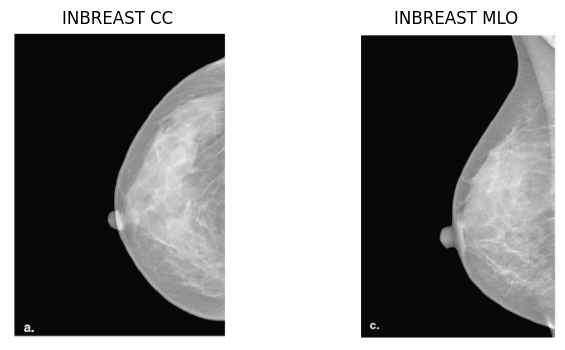

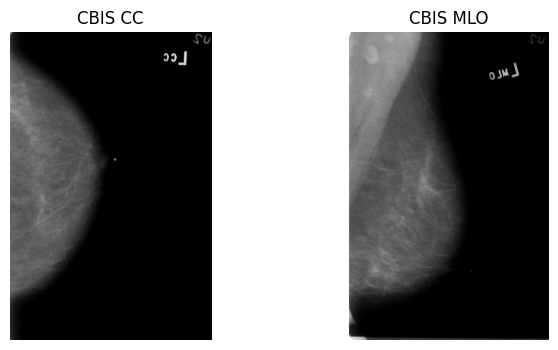

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def plot_example_pair(dataset_name, example_folder="src/data_examples/"):
    """
    Plot CC+MLO pair for a given dataset.
    """
    cc_file = os.path.join(example_folder, f"{dataset_name}-CC.png")
    mlo_file = os.path.join(example_folder, f"{dataset_name}-MLO.png")
    
    if not os.path.exists(cc_file) or not os.path.exists(mlo_file):
        print(f"Example images for {dataset_name} not found in {example_folder}")
        return
    
    img_cc = Image.open(cc_file)
    img_mlo = Image.open(mlo_file)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_cc, cmap='gray')
    plt.title(f"{dataset_name} CC")
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_mlo, cmap='gray')
    plt.title(f"{dataset_name} MLO")
    plt.axis('off')
    
    plt.show()

plot_example_pair("INBREAST")
plot_example_pair("CBIS")

### 4.2 Data Preprocessing 

#### 4.2.1 Convert DICOM Images to PNG

**Goal:** Convert raw `.dcm` images into `.png` format while preserving intensity and folder structure.
* Reads DICOM files using `pydicom`.
* Normalizes pixel intensities to **8-bit (0–255)**.
* Preserves folder structure.

#### 4.2.2 Organize Images and Create DataFrames
**Goal:** Create a structured **Pickle DataFrame (`.pkl`)** through **preprocessing scripts** (one for each dataset) exploiting the converted images and provided metadata.

**Preprocessing Steps**

1. **Paths and Setup**: Define and create folders for raw PNGs, CSV metadata, preprocessed images.

2. **CSV/XML Parsing**: Extract information from CSV files and collect annotations for all images and ROIs.

3. **BIRADS Labeling**: Convert BIRADS scores to binary labels: 0 = benign, 1 = malignant.

4. **ROI Extraction**: 
    * Crop ROI patches from mammograms using full mammographies and related masks, generati resized **cropped images and related masks** for each ROI.
    * Save cropped patches, ROI masks, and full-image masks in structured folder.

    ```graphql
        preprocessed_INBreast/
        │
        ├─ 20586908/
        │   ├─ 1/                     # ROI folder
        │   │   ├─ 1-1.png            # Cropped ROI patch
        │   │   ├─ 1-2.png            # Resized ROI mask
        │   │   └─ 1-3.png            # Full-image mask
        │   ├─ 2/                     # Next ROI folder
        │   │   ├─ 1-1.png
        │   │   ├─ 1-2.png
        │   │   └─ 1-3.png
        │   ├─ ...
        |   |
        |   └─ 20586908_6c613a14b80a8591_MG_R_CC_ANON.png    # Full-image
        |
        ├─ 20586934/
        │   ├─ 1/                     
        │   │   ├─ 1-1.png           
        │   │   ├─ 1-2.png            
        │   │   └─ 1-3.png            
        │   ├─ 2/                     
        │   │   ├─ 1-1.png
        │   │   ├─ 1-2.png
        │   │   └─ 1-3.png
        └─ ...
    ```

5. Merge Metadata and combine PNG filenames, CSV metadata, and XML annotations into a single DataFrame.

6. Two-View Filtering and pickle file (processed dataset) generation

The preprocessing scripts outcome:
* `two_view_roi.pkl` , contains information at the **individual ROI level** with the associated metadata (each entry corresponds to a single ROI), such as patient ID, view, side, file paths, etc.
* A preprocessed folder in which full images and ROI patches are stored in, with the relative masks


In [ ]:
import pandas as pd

pkl_path = "data/INbreast/pkl/two_views_roi.pkl"  
#pkl_path = "data/CBIS-DDSM/pkl/two_views_roi.pkl" 
df_roi = pd.read_pickle(pkl_path)

print("Columns and sample values:")
for col in df_roi.columns:
    sample_values = df_roi[col].dropna()[:1]  
    print(f"{col}: {list(sample_values)}")

Columns and sample values:
image_id: ['20588020']
patient_id: ['024ee3569b2605dc']
lesion: ['Calcification']
birads: ['2']
label: [0]
cropped_path: ['data/INbreast/preprocessed_INbreast/20588020/1/1-1.png']
mask_path: ['data/INbreast/preprocessed_INbreast/20588020/1/1-2.png']
full_mask_path: ['data/INbreast/preprocessed_INbreast/20588020/1/1-3.png']
full_image_path: ['data/INbreast/preprocessed_INbreast/20588020/20588020_024ee3569b2605dc_MG_L_CC_ANON.png']
side: ['L']
view: ['CC']


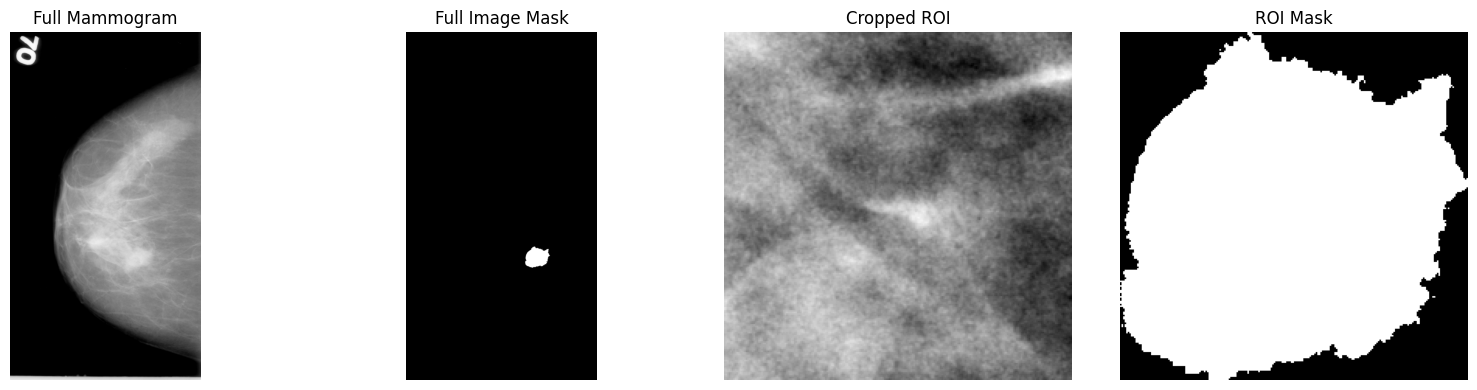

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

src_folder = Path("src/processed_examples")

full_mammogram_path = src_folder / "full.png"
full_mask_path = src_folder / "full-m.png"
cropped_roi_path = src_folder / "cropped.png"
roi_mask_path = src_folder / "cropped-m.png"

# Load images
full_mammogram = Image.open(full_mammogram_path)
full_mask = Image.open(full_mask_path)
cropped_roi = Image.open(cropped_roi_path)
roi_mask = Image.open(roi_mask_path)

# Plot side by side
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(full_mammogram, cmap='gray')
axes[0].set_title("Full Mammogram")
axes[1].imshow(full_mask, cmap='gray')
axes[1].set_title("Full Image Mask")
axes[2].imshow(cropped_roi, cmap='gray')
axes[2].set_title("Cropped ROI")
axes[3].imshow(roi_mask, cmap='gray')
axes[3].set_title("ROI Mask")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()



#### 4.2.3 Radiomic Feature Extraction
The implemented **radiomics extraction pipeline** computes **2D radiomic features** from **ROI patches and masks** of mammograms, working on both **INBreast** and **CBIS-DDSM** datasets.

##### **Key steps**

1. **Load ROI DataFrame**: Load the `two_views_roi.pkl` file containing **preprocessed ROI information** (patient_id, view, side,cropped ROI, mask, lesion metadata, BIRADS label)

2. **Set Radiomics Extractor**
   - Use `pyradiomics.featureextractor.RadiomicsFeatureExtractor`.
   - Settings:
     - `binWidth = 25`
     - `shape2D = True` (2D ROI analysis)
     - `enableAllFeatures()` for **first-order, shape, GLCM, GLRLM, GLSZM, GLDM, NGTDM** features.

3. **Iterate Over ROIs**: The features are extracted over cropped images containing the ROI and the relative mask, converting first mask to binary and matching the **SimpleITK image space**.

4. **Save Features**: Append all features into a DataFrame and save them to CSV:
     - `cbis_radiomics.csv` for CBIS-DDSM
     - `inbreast_radiomics.csv` for INBreast
    In the saved CSV file, each row represent a single **ROI** while the columns include radiomic features and ROI metadata

##### **Radiomic Features** 

| Feature Type | Description | Example Feature |
|--------------|-------------|----------------|
| **Shape (2D)** | Quantifies the **geometrical properties** of the ROI (size, elongation, axes, perimeter, sphericity, etc.). | `original_shape2D_Elongation` |
| **First-Order** | Captures **basic intensity statistics** within the ROI (mean, median, variance, energy, entropy, etc.). | `original_firstorder_Mean` |
| **GLCM** | Measures **texture via pixel intensity relationships** (contrast, correlation, homogeneity, etc.). | `original_glcm_Contrast` |
| **GLRLM** | Captures **texture by quantifying consecutive pixels with same intensity** (short/long runs, emphasis, non-uniformity). | `original_glrlm_ShortRunEmphasis` |
| **GLSZM** | Describes **size and distribution of connected intensity zones** in the ROI (small/large area emphasis, non-uniformity). | `original_glszm_LargeAreaEmphasis` |
| **GLDM** | Quantifies **gray-level dependencies** in the ROI (dependence non-uniformity, variance, high/low gray emphasis). | `original_gldm_DependenceNonUniformity` |
| **NGTDM** | Measures **texture coarseness and contrast** at a neighborhood level. | `original_ngtdm_Coarseness` |
| **Metadata** | Provides **contextual information** about each ROI (patient ID, image ID, lesion type, view, side, BIRADS, label). | `patient_id`, `image_id`, `lesion` |

##### **Radiomic Loader**

After extracting **2D radiomic features**, these features are loaded using **`RadiomicsLoader`** class, which allows conveniently **ROI-level access**. The class **loads a CSV** of radiomic features (`inbreast_radiomics.csv` or `cbis_radiomics.csv`). Features are then separated from metadata, and standardized using using `StandardScaler`. Finally they are converted to PyTorch tensors.
  - `get_radiomics_vector(roi_id)` → returns the scaled feature vector
  - `get_metadata(roi_id)` → returns the associated metadata

In [ ]:
from dataset.radiomics_loader import RadiomicsLoader

# Load radiomics CSV
rad_loader = RadiomicsLoader("data/inbreast_radiomics.csv")

# Get radiomics feature vector for a specific ROI
roi_id = "20588020"  
rad_vector = rad_loader.get_radiomics_vector(roi_id)
print(rad_vector.shape)  

# Get metadata for the same ROI
metadata = rad_loader.get_metadata(roi_id)
print(metadata)


torch.Size([102])
patient_id    024ee3569b2605dc
image_id              20588020
lesion           Calcification
view                        CC
side                         L
birads                       2
label                        0
Name: 14, dtype: object


### 4.2.4 MammogramFullDataset Class

The `MammogramFullDataset` class is designed to provide **multi-view full mammogram images**, their corresponding **lesion masks**, and **radiomic feature vectors** for each patient and breast side for the successive training.

**Input:**  
  - `two_views_roi.pkl` dataframe.
  - Instance of `RadiomicsLoader` providing access to precomputed radiomic features.  
  - Optional `transform` and `augment` parameters for preprocessing and data augmentation.

**Key steps:**

1. Group samples by patient and breast side, keeping only pairs with both **CC** and **MLO** views.  
2. For each view:
   - Load the full mammogram and combine all lesion masks.  
   - Average the radiomic feature vectors of all ROIs.  
   - Apply optional augmentations (small rotations, horizontal flips).  
   - Concatenate image and mask channels.  

**Output:** a dictionary with **CC/MLO inputs** and the **averaged radiomics vector**.


In [ ]:
{
    "patient_id": "00005",
    "side": "L",
    "cc_input": tensor([image + mask]),      # Concatenated full CC image and combined mask
    "mlo_input": tensor([image + mask]),     # Concatenated full MLO image and combined mask
    "radiomics": tensor(averaged_radiomic_vector)  # Average radiomics vector over all ROIs in this view
}


### 4.3 Model Architecture

The project implements a **multi-view generative strategy** to ensure that synthetic mammograms preserve anatomical and clinical consistency across views through a **conditional GAN (cGAN)**, composed by a **UNet-based generator**  and a **PatchGAN-style discriminator**  
The generator is trained to produce MLO views that maintain **structural and clinical correspondence** with the input CC images, guided by **adversarial, L1, perceptual, and SSIM losses**.

* The generator performs **early fusion** by concatenating the CC image and its lesion mask into a **two-channel input**, allowing joint processing of anatomical and lesion-specific structural information from the first layer.

* **Conditional feature-level fusion** is applied via **FiLM layers**, which modulate intermediate feature maps based on radiomics features, ensuring that lesion-specific quantitative characteristics are preserved during generation.


#### 4.3.1 UNet Generator with Radiomics Conditioning (`UNetGeneratorRad`)

The generator follows a **U-Net architecture** to translate CC→MLO (or vice versa), augmented with **radiomics-based FiLM conditioning**.

**Key Components:**
1. **Encoder:** 7 convolutional blocks with downsampling, instance normalization, and LeakyReLU activations.  
2. **Decoder:** 7 transposed convolutional blocks with skip connections, some with dropout.  
3. **Radiomics FiLM:**  
   - Radiomic vector `r` (B × 102 features) is passed through a small MLP.  
   - MLP outputs per-layer **gamma and beta** parameters for feature modulation in decoder layers:  
     \[
     \text{feat}_{\text{mod}} = (1 + \gamma) \cdot \text{feat} + \beta
     \]  
4. **Forward Pass:**  
   - Encoder features are computed with optional checkpointing for memory efficiency.  
   - FiLM-modulated decoder reconstructs the output image (MLO view) with skip connections.  
5. **Output:** Synthesized MLO (or CC) image, 2 channels, values in [-1,1] via Tanh.

The generator is trained to produce MLO views that maintain **structural and clinical correspondence** with the input CC images, guided by **adversarial, L1, perceptual, and SSIM losses**.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.generator import UNetGeneratorRad

G = UNetGeneratorRad(in_channels=2, out_channels=2, rad_dim=102)
cc_input = torch.randn(2, 2, 256, 256)   # batch of 2
rad_feats = torch.randn(2, 102)
fake_mlo = G(cc_input, rad_feats)
print(fake_mlo.shape)  # -> torch.Size([2, 2, 256, 256])


##### Early Fusion in UNet Generator
**Early fusion** is performed at the input stage of the generator. The **CC mammogram image** and its corresponding **lesion mask** are concatenated along the channel dimension to form a **two-channel input**.

#### 4.3.2 PatchGAN Discriminator with Radiomics Conditioning (`PatchDiscriminatorRad`)

The discriminator is a **PatchGAN** that predicts **real/fake** at a patch level and also performs **view classification** (CC vs MLO).

**Key Components:**
1. **Radiomics projection:**  
   - Input radiomics vector (`rad_dim=102`) is projected via a linear layer to 32 channels.  
   - Broadcasted and concatenated to image features before convolution.
2. **Convolutional backbone:**  
   - 4 convolutional layers with downsampling, instance normalization, and LeakyReLU activations.  
   - Operates on image patches to enforce local realism.
3. **Output heads:**  
   - **GAN head:** 1-channel output for patch-level real/fake.  
   - **View head:** global pooled features → linear layer → 2-class output (CC=0, MLO=1).


In [ ]:
import torch
import torch.nn as nn
from models.discriminator import PatchDiscriminatorRad

D = PatchDiscriminatorRad(in_channels=2, ndf=64, rad_dim=102)
img_input = torch.randn(2, 2, 256, 256)
rad_feats = torch.randn(2, 102)
gan_out, view_out = D(img_input, rad_feats)
print(gan_out.shape)   # -> patch-level prediction (2,1,H',W')
print(view_out.shape)  # -> view classification (2,2)


torch.Size([2, 1, 30, 30])
torch.Size([2, 2])


#### 4.3.3 Radiomics Predictor (`RadPredictor`)

This predictor is a small CNN that predicts the **radiomic feature vector** from a generated image.  
It ensures that generated images maintain **quantitative lesion characteristics**.

**Key Components:**
1. **Convolutional feature extractor:**  
   - 2 convolutional layers with ReLU activations.  
   - Max pooling and adaptive average pooling to produce a fixed-size feature vector.  
2. **Fully connected layer:**  
   - Maps extracted features to the radiomics vector (`out_dim=102`).  
3. **Purpose:**  
   - Provides an auxiliary loss (`L_rad`) to enforce **radiomics consistency** in generated images.


In [ ]:
import torch
import torch.nn as nn
from models.rad_predictor import RadPredictor

# Example usage
rad_pred = RadPredictor(in_channels=1, out_dim=102)
fake_img = torch.randn(2, 1, 256, 256)  # generated MLO
pred_rad = rad_pred(fake_img)
print(pred_rad.shape)  

torch.Size([2, 102])


### 4.4 Training 

The conditional GAN (cGAN) is trained to generate **MLO views** from CC mammograms while incorporating lesion masks and radiomics features, by following the steps below. The data are splitted **Patient-wise** to ensure independence between training, validation, and test sets.

#### 4.4.1 Hyperparameters and Parameters
**Dataset & DataLoader**
- Image size: 256 × 256
- Batch size: 4
- Data augmentation: 
  - Random horizontal flip probability: 0.5
  - Random rotation: ±5°
- Normalization: [0.5] mean, [0.5] std

**Generator**
- Input channels: 2 (CC image + lesion mask)
- Output channels: 2 (generated MLO image + mask)
- Radiomics feature dimension: 102

**Discriminator**
- Input channels: 4 (CC + MLO)
- Conditioned on radiomics features

**Loss Weights/Lambdas**
- Pixel-wise L1 loss: ramped from `5.0 → 1.0` over 30 epochs
- Adversarial loss: ramped from `0.1 → 1.0` over 30 epochs
- Perceptual loss: ramped from `0.5 → 1.0` over 30 epochs
- Radiomics loss: ramped from `0.0 → 1.0` over 60 epochs
- SSIM loss weight: `0.2`

**Optimizers**
- Generator: Adam, lr = 2e-4, betas = (0.5, 0.999)
- Discriminator: Adam, lr = 1e-4, betas = (0.5, 0.999)
- Radiomics predictor: Adam, lr = `1e-4

**Training Settings**
- Number of epochs: 40
- Accumulation steps: 4 (gradient accumulation)
- Gradient clipping norm: 1.0
- Mixed precision: `torch.amp.GradScaler`
- Early stopping patience: 5 epochs without SSIM improvement
- Input noise for discriminator: std = 0.03

#### 4.4.2 Model Setup
- **Generator (`UNetGeneratorRad`)**: UNet-based network with early fusion of CC image + lesion mask (2-channel input) and FiLM-based radiomics conditioning.
- **Discriminator (`PatchDiscriminatorRad`)**: PatchGAN-style network evaluating realism of CC-MLO pairs, conditioned on radiomics features.
- **Radiomics predictor (`RadPredictor`)**: Auxiliary network predicting radiomics from generated MLO images to enforce feature consistency.
- **Perceptual network (`VGGPerceptual`)**: Extracts high-level features for perceptual loss computation.

#### 4.4.3 Loss Functions

| Loss                         | Network       | Purpose                                                | Formula                                                                                                                        |
| ---------------------------- | ------------- | ------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------ |
| **Adversarial (GAN) Loss**   | Generator     | Encourage generator to produce realistic MLO images    | $\mathcal{L}_{GAN} = \frac{1}{2} \|D(G(x), r) - 1\|_2^2$                                                                       |
| **View Classification Loss** | Generator     | Ensure generated image corresponds to correct MLO view | $\mathcal{L}_{view} = \text{CrossEntropy}(D_{view}(G(x), r), \text{target\_view})$                                             |
| **L1 Loss**                  | Generator     | Pixel-wise similarity between generated and real MLO   | $\mathcal{L}_{L1} = \| G(x) - y \|_1$                                                                                          |
| **Perceptual Loss**          | Generator     | High-level feature similarity (VGG)                    | $\mathcal{L}_{percep} = \sum_l \| \phi_l(G(x)) - \phi_l(y) \|_1$                                                               |
| **SSIM Loss**                | Generator     | Structural similarity                                  | $\mathcal{L}_{SSIM} = 1 - SSIM(G(x), y)$                                                                                       |
| **Radiomics Loss**           | Generator     | Preserve lesion-specific radiomic features             | $\mathcal{L}_{rad} = \| \text{RadPred}(G(x)) - r \|_1$                                                                         |
| **Adversarial (GAN) Loss**   | Discriminator | Correctly classify real vs fake pairs                  | $\mathcal{L}_{D,GAN} = \frac{1}{2} (\|D(x, y, r) - 1\|_2^2 + \|D(x, G(x), r)\|_2^2)$                                           |
| **View Classification Loss** | Discriminator | Classify correct view for real/fake pairs              | $\mathcal{L}_{D,view} = \frac{1}{3} (\text{CE}(D_{view}(x,y),1) + \text{CE}(D_{view}(x,G(x)),1) + \text{CE}(D_{view}(x,x),0))$ |

**Total Generator Loss** 
$$
\mathcal{L}_G = \lambda_{GAN} \mathcal{L}_{GAN} + \mathcal{L}_{view} + \lambda_{L1} \mathcal{L}_{L1} + \lambda_{percep} \mathcal{L}_{percep} + \lambda_{SSIM} \mathcal{L}_{SSIM} + \lambda_{rad} \mathcal{L}_{rad}
$$

**Total Discriminator Loss**  
$$
\mathcal{L}_D = \mathcal{L}_{D,GAN} + \mathcal{L}_{D,view}
$$


#### 4.4.5 Training Loop
- For each epoch:

    1. Loss weights are **linearly ramped** over epochs to gradually balance contributions from different objectives and stabilize  training

    2. **Generator update**: 
        - Generates fake MLO from CC + mask + radiomics.
        - Computes combined generator loss: adversarial + L1 + perceptual + SSIM + radiomics + view classification.
        - Backpropagates with gradient accumulation.

    3. **Discriminator update**:
        - Receives real and fake CC-MLO pairs (with added input noise).
        - Computes adversarial and view classification losses.

    4. **Checkpointing**: .
        - Models and optimizers are saved.

    5. **Evaluation**: 
        - Generator performance is evaluated on the validation set using **L1, SSIM, and PSNR metrics**.
        - **Early stopping**: Training halts if validation SSIM does not improve over a set patience period.
        - Best model is selected based on **validation SSIM**.
        
    6. **Visualization**:
        - After each epoch, a batch of generated MLO images is saved alongside their real CC and MLO counterparts for qualitative inspection

#### 4.4.6 Testing the System

A test script evaluates the trained generator on the **held-out test set**,  **assessing the final model performance** on data not seen during training or validation and quantifying **generalization ability** of the generator to unseen patient cases

1. **Setup**:  
    - Load the best model checkpoint.  
    - Load the test dataset (CC views + radiomics) corresponding to the **test split**.  
    - Apply the same preprocessing as training.

2. **Evaluation**:
    - Generate MLO images from CC + radiomics.  
    - Compute metrics over the test set:
        - **L1 loss**, **SSIM**, **PSNR**.  
    - Performed in `torch.no_grad()` mode, no backpropagation.

3. **Visualization**:
    - Save sample outputs (CC input, generated MLO, real MLO) for qualitative inspection.


### 5. Hardware and Software Environment

#### Hardware
- **GPU:** NVIDIA GeForce RTX 4060 Laptop GPU  
- **Memory:** ~7.75 GB  
- **CUDA support:** Yes (used for accelerating training and inference)

#### Software
- **Operating System:** Ubuntu 22.04 LTS  
- **Python version:** 3.10  
- **PyTorch:** 2.1 with CUDA 12.1 support  

#### Notes
- Mixed-precision training (`torch.amp`) was enabled to optimize GPU memory usage.  
- Batch size was limited by GPU memory to **4** per iteration for full-resolution mammogram images.  


## 6. Results and Analysis 

In this section, the training performance of the generator network on the **INbreast dataset** and **CBIS-DDSM dataset** separately. 

### 6.1 Quantitative metrics
To quantitatively evaluate the model, both **training losses** and **validation metrics** are monitored.

Specifically, **validation metrics** provide insight into image quality and reconstruction fidelity:

* **L1 Loss (Mean Absolute Error)**: Measures the average pixel-wise difference between generated and real MLO images. Lower values indicate more accurate reconstruction of intensity values.  
* **SSIM (Structural Similarity Index)**: Quantifies similarity in **structural patterns, edges, and textures** between generated and real images. Values range from 0 to 1, with higher values indicating better structural fidelity.  
* **PSNR (Peak Signal-to-Noise Ratio)**: Measures **signal fidelity**, i.e., how closely the generated image intensities match the real images. Higher values (in dB) correspond to more accurate intensity reconstruction and less noise.


#### INbreast 
**Metrics at best checkpoint (epoch 36)**

| Metric      | Value          |
|------------|----------------|
| Generator Loss (loss_G) | 1.8945         |
| Discriminator Loss (loss_D) | 0.0549      |
| GAN Loss (loss_GAN) | 0.3795           |
| L1 Loss (loss_L1) | 0.1342            |
| Perceptual Loss (loss_percep) | 0.7779  |
| Radiomics Loss (loss_rad) | 0.5557       |

**Evaluation of Model Performance on Validation and Test Sets**

| Metric    |   L1    | SSMI |  PSNR  |
|-----------|----------|-----------|---------|
| **Validation set value** | 9444.5792 | 0.6268 | 17.07 dB |
| **Test set value** | 8831.1843 | 0.6285  |17.27 dB |


**Key observations:**

* **L1** decreases from ~28k to ~8.8k, indicating progressive reduction in pixel-wise reconstruction error.  
* **SSIM** rises from ~0.007 to ~0.62, indicating that structural fidelity is reasonable but still not perfect.  
* **PSNR** increases from ~9.7 dB to ~17.6 dB, indicating decent reconstruction quality, but not enough for clinical-grade fidelity. 
* **Generator and discriminator losses** are low and balanced at best checkpoint, suggesting stable adversarial training
* Slightly better performances on test set than on validation set, indicating **consistent generalization**.

**Limitations**
* SSIM < 0.65 and PSNR < 18 dB suggest **some anatomical details and contrast variations are still imperfectly captured**.  
* Computational cost is high for high-resolution mammograms and multi-modal inputs.  
* GPU memory may limit batch size or resolution scaling.


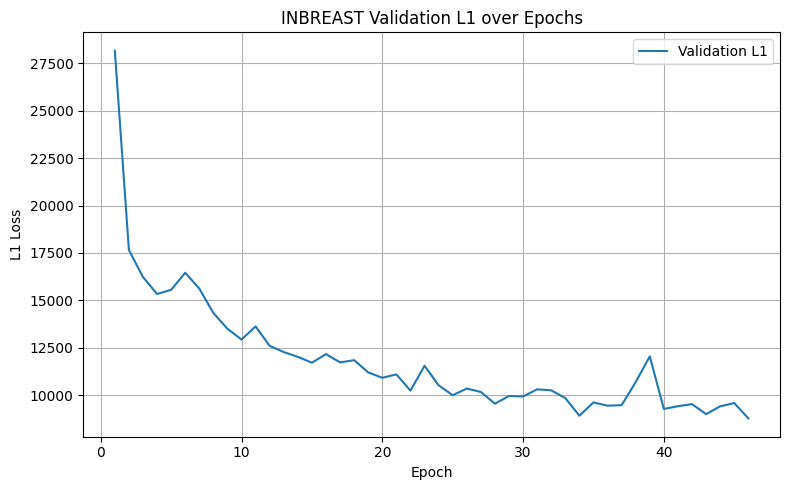

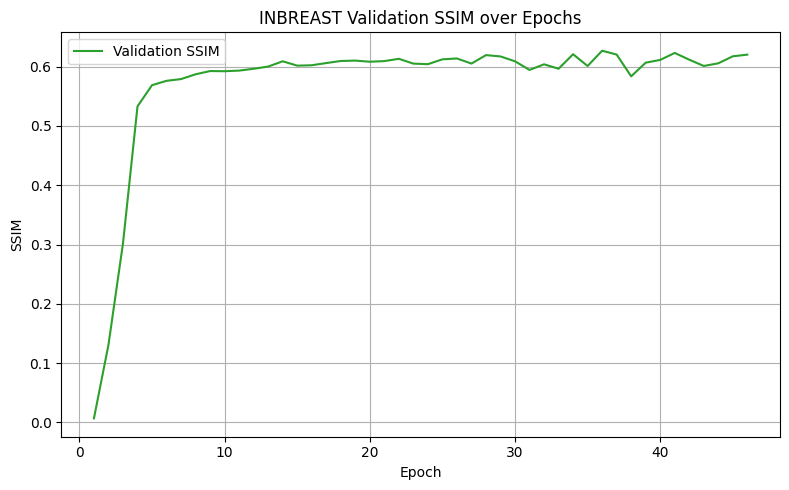

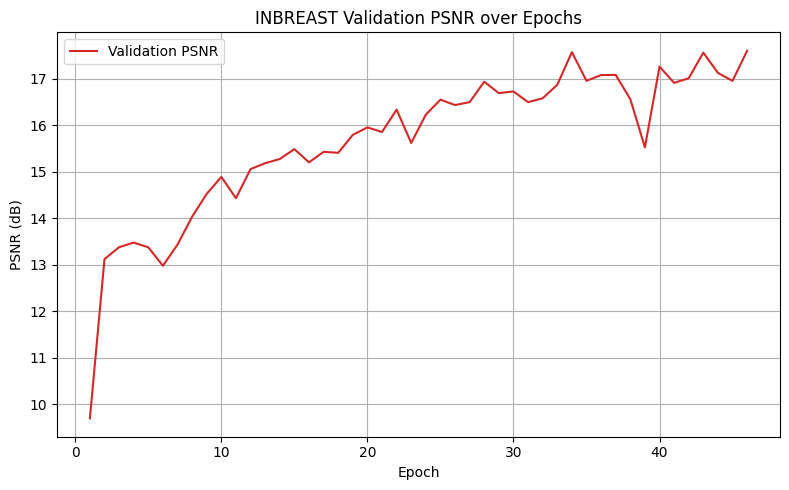

In [ ]:
#generating plots
from utils.plot_results import plot_training_metrics
plot_training_metrics("inbreast")


#### CBIS-DDSM 

**Metrics at best checkpoint (epoch 24)**

| Metric      | Value          |
|------------|----------------|
| Generator Loss (loss_G) | 1.7476         |
| Discriminator Loss (loss_D) | 0.0350      |
| GAN Loss (loss_GAN) | 0.6441           |
| L1 Loss (loss_L1) | 0.1885            |
| Perceptual Loss (loss_percep) | 0.6301  |
| Radiomics Loss (loss_rad) | 0.2120       |

**Evaluation of Model Performance on Validation and Test Sets**

| Metric    |   L1    | SSIM |  PSNR  |
|-----------|----------|------|---------|
| **Validation set value** | 10977.29 | 0.6431 | 16.49 dB |
| **Test set value** | 10652.0647 | 0.6462,  | 16.63 dB |

**Key observations:**

* **L1** decreases from ~15,520 to ~10,977 on validation, indicating progressive reduction in pixel-wise reconstruction error.  
* **SSIM** rises from ~0.437 to ~0.643, indicating structural fidelity improves significantly over training.  
* **PSNR** increases from ~14.03 dB to ~16.49 dB, reflecting improved image quality, though still moderate for clinical-grade fidelity.  
* **Generator and discriminator losses** are low and balanced at best checkpoint, suggesting stable adversarial training.  
* Slightly better SSMI and PSNR on test than on validation set indicates **consistent generalization**.

**Limitations**
* SSIM < 0.65 and PSNR < 17 dB suggest **some anatomical details and contrast variations are still imperfectly captured**.  
* Computational cost is high for high-resolution mammograms and multi-modal inputs.  
* GPU memory may limit batch size or resolution scaling.




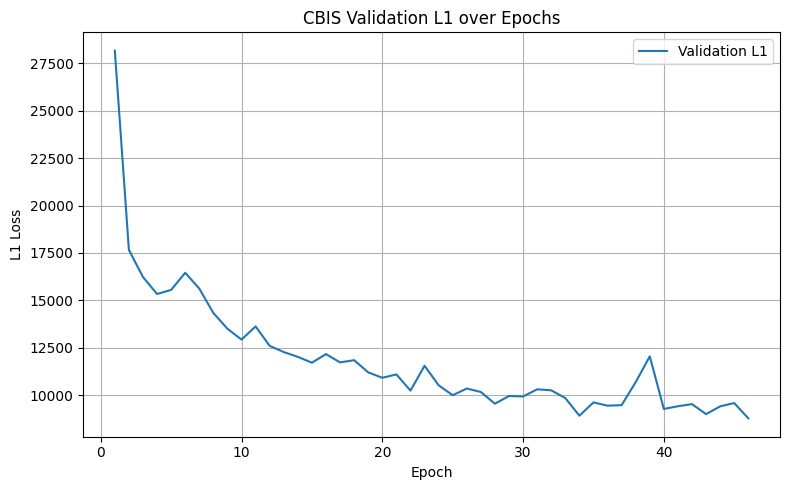

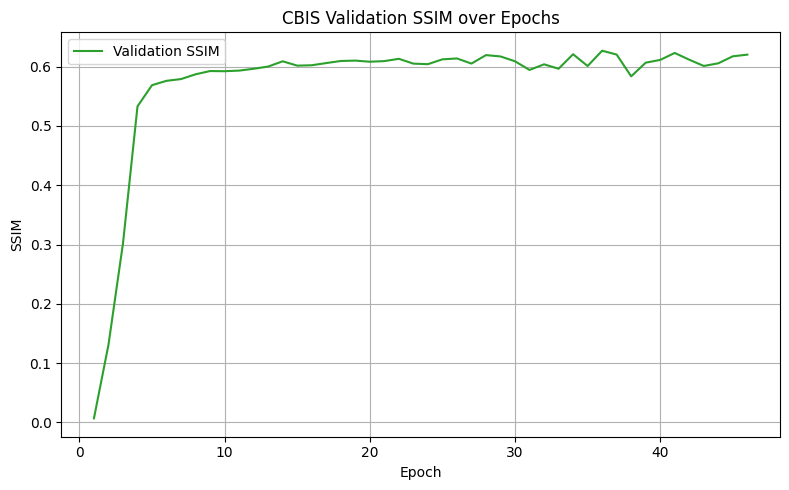

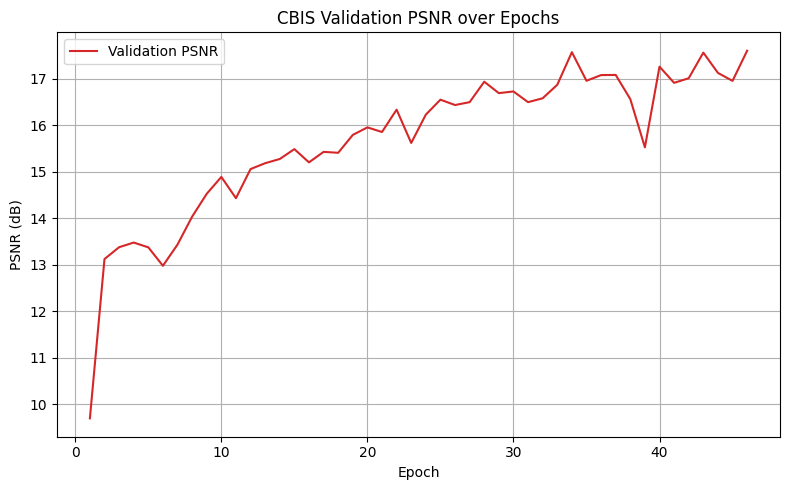

In [6]:
#generating plots
from utils.plot_results import plot_training_metrics
plot_training_metrics("cbis")

### 6.2 Qualitative Metrics

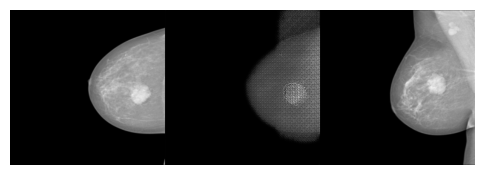

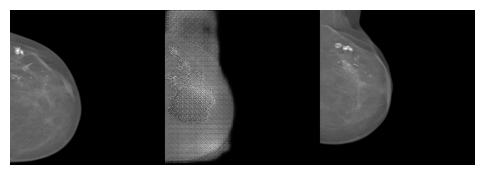

In [ ]:
# INBREAST: : the central image is the generated one
from src.plot_examples import show_image

# Training sample 
show_image('src/results_train/inbreast_train.png')
# Test sample
show_image('src/results_test/inbreast_test.png')


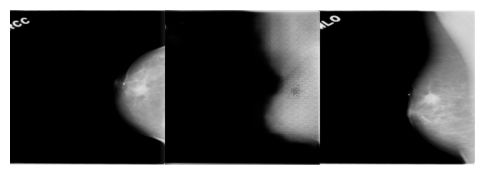

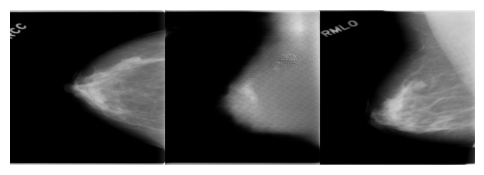

In [ ]:
# CBIS: the central image is the generated one
from src.plot_examples import show_image

# Training sample 
show_image('src/results_train/cbis_train.png')
# Test sample
show_image('src/results_test/cbis_test.png')

## 7. Limitations and Future Improvements

### 7.1 **Limitations:**

1. **Dataset Size and Diversity**:  
   - Training is performed on limited datasets (CBIS-DDSM, INbreast), which may affect generalization to new patient populations or imaging protocols.

2. **Image Resolution Constraints**:  
   - Preprocessing resizes mammograms to a fixed resolution, potentially losing fine lesion details important for diagnosis.

3. **Single-View Conditioning**:  
   - The generator uses only CC view + radiomics to generate MLO images, which may limit the capture of multi-view dependencies and inter-lesion relationships.

4. **Metric Limitations**:  
   - SSIM, PSNR, and L1 assess image similarity but do not fully capture clinical relevance or lesion-level consistency.

5. **Computational Resources**:  
   - Training and inference require substantial GPU memory and processing time.  
   - High-resolution images increase memory footprint and prolong training/testing, limiting scalability on standard hardware.


### 7.2 **Future Improvements:**

1. **Multi-View and Multi-Modal Integration**:  
   - Combine CC and MLO views or additional modalities (e.g., ultrasound, MRI) using attention or fusion strategies for richer representations.
   - Explore simultaneous generation of CC-MLO pairs to ensure cross-view consistency and preserve lesion correlations.

2. **Hypercomplex Neural Networks Integration**:  
   - HNNs are suitable for capturing inter-view correlations and multimodal relations.

3. **Diffusion Models**:  
   - Explore diffusion-based generative models for more realistic and high-fidelity mammogram synthesis.
   - **Requirements**: These models are computationally intensive and require large memory and longer training times, as well as careful design of noise schedules and conditioning on multi-modal features (CC, radiomics, etc.).

4. **Integration with Multi-View Classification Systems**:  
   - Feed the generated high-resolution CC/MLO mammograms into multi-view classification networks (such as the multi-view hypercomplex networks by Lopez et al. (2024)) to exploit inter-view correlations.
   - Enhance breast cancer detection and lesion classification by combining generative outputs with existing diagnostic models.

5. **Extension to Multi-View Analysis**:  
   - Enabling double comparison across **ipsilateral** and **bilateral** views.

6. **Clinical Evaluation Metrics**:  
   - Introduce lesion-level metrics, such as BI-RADS consistency or mass detection accuracy, alongside SSIM/PSNR.


## 8. Reproducibility Instructions (README.md)
This project is implemented on a Linux-based operating system (Ubuntu 22.04.5 LTS, 64-bit).\
To run the code, a working Python environment is required.\
The system utilizes an NVIDIA GeForce RTX GPU, optimized for GPU acceleration with CUDA for enhanced performance.

Thus, It is recommended to run the whole system **locally** in a Conda environment.


The commands are avaiable in the **README.md** file.


In [ ]:
!conda create --name mammogan python=3.9

In [ ]:
!conda activate mammogan

Once you have downloaded this system from GitHub, navigate inside the `MultiGenMod-BCS` directory (customizing path/to/directory/ with respect where you have located the system)

In [ ]:
%cd path/to/directory/MultiGenMod-BCS

### Requirements
As first step, please install the dependencies needed for running the system.


In [ ]:
!pip install -r requirements.txt

Otherwise, you can use the YAML file for regenerating the used environment, stored in the repository.

In [ ]:
!conda env create -f environment.yml
!conda activate mammogan

### Reproducibility instructions

Two options are available:

1. **Rebuild the full pipeline from raw data**  
   - Download the original datasets and apply all preprocessing steps (conversion, preprocessing, roi extraction).  
   - Provides full control and flexibility, but requires access to raw images.  

2. **Use provided `.pkl` and `.csv` files**  
   - Directly reproduce training and evaluation.  
   - Fast and consistent with reported results.  


#### **OPTION 1: Running the full system**

##### **Data collection**
The **INBreast dataset** contains **410 full-field digital mammograms (FFDMs)** from **115 cases (90 patients)** in **DICOM format**. Each image is **expert-annotated** with **ROIs** labeled as **masses, calcifications, distortions, or spiculated regions**. 

INbreast dataset is publicly avaiable at this link: https://www.kaggle.com/datasets/ramanathansp20/inbreast-dataset .
Once you have downloaded and unzipped the data, you have to place inside `data/INbreast` folder the following folders from the downloaded dataset:
- AllDICOMs folder
- AllXML folder
- INbreast.csv (if not already in the folder)

The directory should have the following structure:
```graphql
    MultiGenMod-BCS
    │── data/                  # Datasets and preprocessing scripts
    │   │── INbreast/               
    │   │   │── AllDICOMs/            # DICOMs folder
    │   │   │   │── 20586908_6c613....dcm
    │   │   │   │── 20586934_6c613....dcm
    │   │   │    ...
    │   │   │── AllXML/               # XML folder
    │   │   │   │── 20586908.dcm
    │   │   │   │── 20586934.dcm
    │   │   │   ...
    │   │   └── INbreast.csv/         # CSV file
    │   │
    │   │ 
     ...

```

The **CBIS-DDSM dataset** contains **10,239 FFDMs** from **6,671 patients** in **DICOM format**. Each image includes **expert-annotated ROIs** labeled as **masses or calcifications** with **lesion properties** (size, shape, density).  

CBIS-DDSM dataset can be downloaded at this link: https://www.cancerimagingarchive.net/collection/cbis-ddsm
Similarly to INbreast dataset, once you have downloaded and unzipped the data, you have to place inside `data/CBIS-DDSM` folder the following folders from the downloaded dataset:
- CBIS-DDSM folder (containing the DICOM images)
- calc_case_description_test_set.csv (if not already in the folder)
- calc_case_description_train_set.csv
- mass_case_description_train_set.csv
- mass_case_description_test_set.csv
- metadata.csv

The directory should have the following structure:
```graphql
    MultiGenMod-BCS
    │── data/                  # Datasets and preprocessing scripts
    │   │── CBIS-DDSM/               
    │   │   │── CBIS-DDSM/            # DICOMs folders
    │   │   │   │── Calc-Test_P_00038_LEFT_CC_1/
    │   │   │   │── Calc-Test_P_00038_LEFT_CC/
    |   |   |   │── Calc-Test_P_00038_LEFT_MLO_1/
    │   │   │    ...
    │   │   │── calc_case_description_train_set.csv      # all CSVs
    │   │   │── calc_case_description_test_set.csv
    │   │   │── mass_case_description_train_set.csv
    │   │   │── mass_case_description_train_set.csv
    │   │   └── metadata.csv
    │   │   
    │   │
    │   │ 
     ...

```
##### **Convert images from DICOM to PNG format**
For generating the converted version of INbreast (or of CBIS-DDSM) images from DICOM to PNG format and store them into `data/INbreast/AllPNGs` folder (`data/INbreast/AllPNGs` for CBIS-DDSM), run the following command


In [ ]:
#INbreast
!python main.py --dataset inbreast --task convert

In [ ]:
#CBIS-DDSM
!python main.py --dataset cbis --task convert

##### **Preprocessing the dataset using PNGs, CSV and XML annotations**
For performing the preprocessing on **INbreast**, run the following command:

In [ ]:
#INbreast
!python main.py --dataset inbreast --task preprocess

After the execution of this command, 
- the PNG preprocessed images are stored in `data/INbreast/preprocessed_inbreast` directory
- the `two_views_roi.pkl` dataframe is saved in ``data/INbreast/pkl` directory

For performing the preprocessing on **CBIS-DDSM**, run the following command:

In [ ]:
#CBIS-DDSM
!python main.py --dataset cbis --task preprocess

After the execution of this command, 
- the PNG preprocessed images are stored in `data/CBIS-DDSM/preprocessed_cbis` directory
- the `two_views_roi.pkl` dataframe is saved in ``data/CBIS-DDSM/pkl` directory

##### **Extract radiomic features**
For extracting the radiomic features from preprocessed INbreast/CBIS-DDSM images, run the following command


In [ ]:
#INBREAST
!python main.py --dataset inbreast --task radiomic


In [ ]:
#CBIS
!python main.py --dataset cbis --task radiomics



After the execution of this command, the `inbreast_radiomics.csv` (or `cbis_radiomics.csv`) is saved in `data/` directory

##### **Train and evaluate the model**
Run the following command to 
- **train** the model saving metrics and statistics in `results.csv` file (`checkpoints/train/inbreast/results.csv`)
- create and save the **checkpoints** (`checkpoints/train/inbreast`)
- **evaluate** the model using validation data and saving visual samples for each epoch (`checkpoints/val/inbreast`)
- save **visualizations** of the output images(`generated_images_full/`)


In [ ]:
#INBREAST
!python main.py --dataset inbreast --task train

In [ ]:
#CBIS
!python main.py --dataset cbis --task train

##### **Test the model**
As last set, run the following command for testing the system on unseen data:

In [ ]:
!python main.py --dataset cbis --task test

#### **OPTION 2: Train/Test the system**
Using the CSV, dataframes and metadata already in the folder, train or test the system running the commands above.

## 9. References

- Comminiello, N., Paratore, G., Brutti, A., et al. **Multi-View Hypercomplex Learning for Breast Cancer Screening** 2022. [https://arxiv.org/abs/2204.05798](https://arxiv.org/abs/2204.05798)
- Two‑View Mammogram Synthesis (Applied Sciences, 2022): https://www.mdpi.com/2076-3417/12/23/12206
- Joint Holistic & Lesion‑Controllable Diffusion (arXiv, 2025): https://arxiv.org/abs/2507.19201
- Ipsilateral Dual‑View Lesion Synthesis (ICCV 2023 Workshops): 
  https://openaccess.thecvf.com/content/ICCV2023W/CVAMD/papers/Nguyen_Towards_Robust_Natural-Looking_Mammography_Lesion_Synthesis_on_Ipsilateral_Dual-Views_Breast_ICCVW_2023_paper.pdf
- CBIS‑DDSM (TCIA collection): https://www.cancerimagingarchive.net/collection/cbis-ddsm/  
  CBIS‑DDSM (journal description): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5735920/
- INbreast (original paper/abstract): https://pubmed.ncbi.nlm.nih.gov/22078258/
